In [1]:
import subprocess

#Generate .smt2 file in Dafny

#set the information
shell_used = "powershell" #The shell used
Dafny_path = "~/.vscode/extensions/dafny-lang.ide-vscode-3.2.1/out/resources/4.3.0/github/dafny" #dafny directory path
dfy_fpath = "./Dafny_file.dfy" # .dfy file path
smt2_fname = "Dafny_VC.smt2" # .smt2 file name 
smt2_generation_cmd = "./dafny verify --solver-log " + smt2_fname + " --boogie /normalizeNames:0 " + dfy_fpath
command = [shell_used, "cd " + Dafny_path +";" + smt2_generation_cmd]

# Execute the command 
result = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(result.stdout)


Dafny program verifier finished with 1 verified, 0 errors



In [26]:
# Copy and paste push pop pairs in the smt2 file just generated
import os

def duplicate_lines(filename, dup_times):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Find the positions of push and pop lines
    start_line = None
    end_line = None
    for i, line in enumerate(lines):
        if '(push 1)' in line:
            start_line = i
        elif '(pop 1)' in line:
            end_line = i
            break

    if start_line is not None and end_line is not None:
        # Extract the section to duplicate
        section_to_duplicate = lines[start_line:end_line + 1]
        
        # Duplicate the section several times as asked
        duplicated_section = section_to_duplicate * (dup_times)
        
        start_insert = end_line+1
        for j in range(len(duplicated_section)):
            lines.insert(start_insert,duplicated_section[j])
            start_insert += 1

        # Rewrite the .smt2 file
        with open(filename, 'w') as output_file:
            output_file.writelines(lines)
            
        #count total number of push pop pairs in the file
        count = 0
        for i, line in enumerate(lines):
            if '(push 1)' in line:
                count += 1
        print("There are", count, "push and pop pairs now")
        
    else:
        print("Commands not found in file.")

# Usage
smt2_path = os.path.expanduser(Dafny_path + '/' + smt2_fname) 
duplicate_lines(smt2_path, 10)

There are 21 push and pop pairs now


In [25]:
# Measuring the proving time

#command = f'start powershell -NoExit -Command "cd \'{Dafny_path}\'; hyperfine \'.\\z3\\bin\\z3-4.12.1.exe {smt2_fname}\'"'
#command = [shell_used, "cd " + Dafny_path +";" + "hyperfine \'.\\z3\\bin\\z3-4.12.1.exe {smt2_fname}\'"]
command = [shell_used, "cd " + Dafny_path +";" + "hyperfine \'.\\z3\\bin\\z3-4.12.1.exe " + smt2_fname + "\'"]

# Execute the command 
result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')

#Print the output
output = result.stdout
print(output)

def grab_time(output):
    flag = False
    for i in range(len(output)):
        if output[i] == '\n':
            flag = True
            continue
        if output[i:i+2] == "ms" and flag == True:
            return float(output[i-5:i-1])
    return -1

print(grab_time(output))
            

Benchmark 1: .\z3\bin\z3-4.12.1.exe Dafny_VC.smt2
  Time (mean ± σ):      32.2 ms ±   1.0 ms    [User: 14.9 ms, System: 0.2 ms]
  Range (min … max):    30.6 ms …  34.4 ms    72 runs
 

32.2



Dafny program verifier finished with 1 verified, 0 errors

There are 10 push and pop pairs now
There are 20 push and pop pairs now
There are 30 push and pop pairs now
There are 40 push and pop pairs now
There are 50 push and pop pairs now
There are 60 push and pop pairs now
There are 70 push and pop pairs now
There are 80 push and pop pairs now
There are 90 push and pop pairs now
There are 100 push and pop pairs now


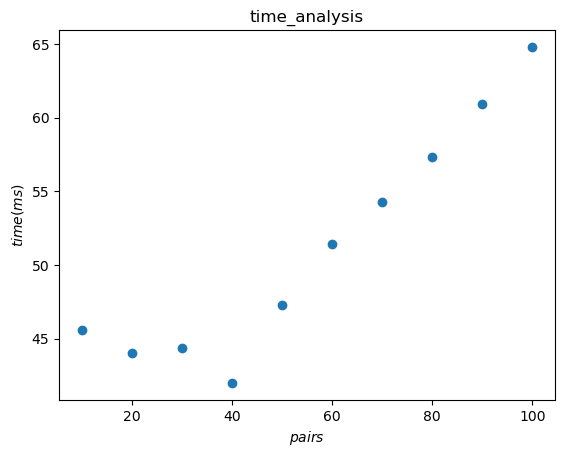

In [37]:
import subprocess
import os
import numpy as np
from matplotlib import pyplot as plt

def time_analysis(pairNum_list):
    #Generate .smt2 file in Dafny
    #set the information
    shell_used = "powershell" #The shell used
    Dafny_path = "~/.vscode/extensions/dafny-lang.ide-vscode-3.2.1/out/resources/4.3.0/github/dafny" #dafny directory path
    dfy_fpath = "./Dafny_file.dfy" # .dfy file path
    smt2_fname = "Dafny_VC.smt2" # .smt2 file name 
    smt2_generation_cmd = "./dafny verify --solver-log " + smt2_fname + " --boogie /normalizeNames:0 " + dfy_fpath
    command = [shell_used, "cd " + Dafny_path +";" + smt2_generation_cmd]
    
    # Execute the command 
    result = subprocess.run(command, capture_output=True, text=True)
    
    # Print the output
    print(result.stdout)
    
    smt2_path = os.path.expanduser(Dafny_path + '/' + smt2_fname) 
    command = [shell_used, "cd " + Dafny_path +";" + "hyperfine \'.\\z3\\bin\\z3-4.12.1.exe " + smt2_fname + "\'"]

    times = []
    previous = 1
    for i in pairNum_list:
        duplicate_lines(smt2_path, i-previous)
        result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')
        previous = i
        times.append(grab_time(result.stdout))

    #draw the picture for time depends on pair_number
    plt.figure()
    plt.scatter(pairNum_list, times)
    plt.xlabel('$pairs$')
    plt.ylabel('$time(ms)$')
    plt.title('time_analysis')
    plt.show()

time_analysis([10,20,30,40,50,60,70,80,90,100])


In [95]:
#Generate .smt2 file in Verus

#set the information
shell_used = "powershell" #The shell used
Verus_path = "E:/Verus/verus/source/target-verus/release" #Verus directory path (must go to release!!!!!)
Verus_fpath = "./Verus_file.rs" # .rs file path
smt2_generation_cmd = "./verus --log-smt " + Verus_fpath
command = [shell_used, "cd " + Verus_path +";" + smt2_generation_cmd]

# Execute the command 
result = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(result)

CompletedProcess(args=['powershell', 'cd E:/Verus/verus/source/target-verus/release;./verus --log-smt ./Verus_file.rs'], returncode=0, stdout='verification results:: 2 verified, 0 errors\n', stderr='')


In [108]:
# Copy and paste push pop pairs in the smt2 file just generated
import os

def duplicate_lines(filename, dup_times):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Find the positions of push and pop lines
    start_line = None
    end_line = None
    for i, line in enumerate(lines):
        if '(push)' in line:
            start_line = i
        elif '(pop)' in line:
            end_line = i
            break

    if start_line is not None and end_line is not None:
        # Extract the section to duplicate
        section_to_duplicate = lines[start_line:end_line + 1]
        
        # Duplicate the section several times as asked
        duplicated_section = section_to_duplicate * (dup_times)
        
        start_insert = end_line+1
        for j in range(len(duplicated_section)):
            lines.insert(start_insert,duplicated_section[j])
            start_insert += 1

        # Rewrite the .smt2 file
        with open(filename, 'w') as output_file:
            output_file.writelines(lines)
            
        #count total number of push pop pairs in the file
        count = 0
        for i, line in enumerate(lines):
            if '(push)' in line:
                count += 1
        print("There are", count-1, "push and pop pairs now")
        
    else:
        print("Commands not found in file.")

# Usage
smt2_path = os.path.expanduser(Verus_path + '/.verus-log/root.smt2') 
duplicate_lines(smt2_path, 5000)

There are 12011 push and pop pairs now


In [110]:
# Measuring the proving time

command = f'start powershell -NoExit -Command "cd \'{Verus_path}\'; hyperfine  \'.\\z3.exe./.verus-log/root.smt2\'"'
# Execute the command 
result = subprocess.run(command, shell=True, capture_output=False, text=False)

#Print the output
#print(result)